# Our Data-driven Development

Originally we planned to analyze our data in conjunction with facial recognition APIs. We stored pictures of ourselves using a quick an dirty [Node.js script](https://gist.github.com/aaronkh/add182a3b12a2a5b3d3487b54a93b7c9), then we were left with the data below. Unfortunately, we couldn't get to analyzing the data in time, but feel free to look at the cleaning process below. 

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from IPython.core.display import display, HTML
import json
import seaborn as sns
import numpy as np

pd.options.mode.chained_assignment = None 

# Data Cleaning
This is a snapshot of our raw data. It was uploaded to an Azure server for NLP and facial recognition APIs.

In [ ]:
# We pull the table
raw_tsv = requests.get('https://hacktech-2020.azurewebsites.net/data.csv').text
with open('data.csv', 'w+') as f:
    f.write(raw_tsv)
    f.close()

In [146]:
df = pd.read_csv('./data.csv', sep='\t', header=None)
df.head() # Let's take a look at what's in our table

,0,1,2,3,4,5
0,1583551162518,aaron,1583551162284-230606255.jpg,t,"{""documents"":[{""id"":""1"",""sentiment"":""neutral"",...","[{""faceId"":""9ae8eefa-9a7c-4137-8859-590a885f57..."
1,1583563313049,aaron,1583563313575-827655847.jpg,{krystal},"{""documents"":[{""id"":""1"",""sentiment"":""neutral"",...","[{""faceId"":""83405c3c-5f02-48be-b85e-81ddc158d0..."
2,1583563364060,aaron,1583563364482-79528200.jpg,{krystal},"{""documents"":[{""id"":""1"",""sentiment"":""neutral"",...","[{""faceId"":""ee6683dd-fd5b-4005-b59c-8bb99ca5df..."
3,1583563387332,aaron,1583563387718-833058606.jpg,{krystal},"{""documents"":[{""id"":""1"",""sentiment"":""neutral"",...","[{""faceId"":""b2caf758-9d55-4a4c-87c5-f64d7cca71..."
4,1583563423251,aaron,1583563423677-886855802.jpg,{krystal},"{""documents"":[{""id"":""1"",""sentiment"":""neutral"",...","[{""faceId"":""20ecd124-c47a-4ff6-b5b6-6547eff4e1..."


In [147]:
# Rename the columns
df.columns = ['timestamp', 'author', 'img', 'message', 'nlp',  'face']
df = df.drop(0, axis=0)
df.head()

,timestamp,author,img,message,nlp,face
1,1583563313049,aaron,1583563313575-827655847.jpg,{krystal},"{""documents"":[{""id"":""1"",""sentiment"":""neutral"",...","[{""faceId"":""83405c3c-5f02-48be-b85e-81ddc158d0..."
2,1583563364060,aaron,1583563364482-79528200.jpg,{krystal},"{""documents"":[{""id"":""1"",""sentiment"":""neutral"",...","[{""faceId"":""ee6683dd-fd5b-4005-b59c-8bb99ca5df..."
3,1583563387332,aaron,1583563387718-833058606.jpg,{krystal},"{""documents"":[{""id"":""1"",""sentiment"":""neutral"",...","[{""faceId"":""b2caf758-9d55-4a4c-87c5-f64d7cca71..."
4,1583563423251,aaron,1583563423677-886855802.jpg,{krystal},"{""documents"":[{""id"":""1"",""sentiment"":""neutral"",...","[{""faceId"":""20ecd124-c47a-4ff6-b5b6-6547eff4e1..."
5,1583563604700,skylar,1583563605003-602064868.jpg,message,"{""documents"":[{""id"":""1"",""sentiment"":""neutral"",...",[]


In [148]:
# Cast time to something more pleasant than epoch time
df['timestamp'] = pd.to_datetime(df.timestamp, unit="ms") 
df.head()

,timestamp,author,img,message,nlp,face
1,2020-03-07 06:41:53.049,aaron,1583563313575-827655847.jpg,{krystal},"{""documents"":[{""id"":""1"",""sentiment"":""neutral"",...","[{""faceId"":""83405c3c-5f02-48be-b85e-81ddc158d0..."
2,2020-03-07 06:42:44.060,aaron,1583563364482-79528200.jpg,{krystal},"{""documents"":[{""id"":""1"",""sentiment"":""neutral"",...","[{""faceId"":""ee6683dd-fd5b-4005-b59c-8bb99ca5df..."
3,2020-03-07 06:43:07.332,aaron,1583563387718-833058606.jpg,{krystal},"{""documents"":[{""id"":""1"",""sentiment"":""neutral"",...","[{""faceId"":""b2caf758-9d55-4a4c-87c5-f64d7cca71..."
4,2020-03-07 06:43:43.251,aaron,1583563423677-886855802.jpg,{krystal},"{""documents"":[{""id"":""1"",""sentiment"":""neutral"",...","[{""faceId"":""20ecd124-c47a-4ff6-b5b6-6547eff4e1..."
5,2020-03-07 06:46:44.700,skylar,1583563605003-602064868.jpg,message,"{""documents"":[{""id"":""1"",""sentiment"":""neutral"",...",[]


In [149]:
# Turn raw JSON into a Python dict for sentiment analysis
df.nlp = df.nlp.map(lambda item: json.loads(item)['documents'][0]['documentScores']) 
df.head()

,timestamp,author,img,message,nlp,face
1,2020-03-07 06:41:53.049,aaron,1583563313575-827655847.jpg,{krystal},"{'positive': 0.02, 'neutral': 0.98, 'negative'...","[{""faceId"":""83405c3c-5f02-48be-b85e-81ddc158d0..."
2,2020-03-07 06:42:44.060,aaron,1583563364482-79528200.jpg,{krystal},"{'positive': 0.02, 'neutral': 0.98, 'negative'...","[{""faceId"":""ee6683dd-fd5b-4005-b59c-8bb99ca5df..."
3,2020-03-07 06:43:07.332,aaron,1583563387718-833058606.jpg,{krystal},"{'positive': 0.02, 'neutral': 0.98, 'negative'...","[{""faceId"":""b2caf758-9d55-4a4c-87c5-f64d7cca71..."
4,2020-03-07 06:43:43.251,aaron,1583563423677-886855802.jpg,{krystal},"{'positive': 0.02, 'neutral': 0.98, 'negative'...","[{""faceId"":""20ecd124-c47a-4ff6-b5b6-6547eff4e1..."
5,2020-03-07 06:46:44.700,skylar,1583563605003-602064868.jpg,message,"{'positive': 0.1, 'neutral': 0.73, 'negative':...",[]


In [150]:
# ... do the same for face...
json.loads(df.face[2])[0]['faceRectangle']
df.face = df.face.map(lambda item: json.loads(item))
df.face = df.face.map(lambda item: item[0]['faceRectangle'] if len(item) else [])
df.head()

,timestamp,author,img,message,nlp,face
1,2020-03-07 06:41:53.049,aaron,1583563313575-827655847.jpg,{krystal},"{'positive': 0.02, 'neutral': 0.98, 'negative'...","{'top': 131, 'left': 191, 'width': 196, 'heigh..."
2,2020-03-07 06:42:44.060,aaron,1583563364482-79528200.jpg,{krystal},"{'positive': 0.02, 'neutral': 0.98, 'negative'...","{'top': 108, 'left': 211, 'width': 124, 'heigh..."
3,2020-03-07 06:43:07.332,aaron,1583563387718-833058606.jpg,{krystal},"{'positive': 0.02, 'neutral': 0.98, 'negative'...","{'top': 99, 'left': 214, 'width': 115, 'height..."
4,2020-03-07 06:43:43.251,aaron,1583563423677-886855802.jpg,{krystal},"{'positive': 0.02, 'neutral': 0.98, 'negative'...","{'top': 96, 'left': 198, 'width': 129, 'height..."
5,2020-03-07 06:46:44.700,skylar,1583563605003-602064868.jpg,message,"{'positive': 0.1, 'neutral': 0.73, 'negative':...",[]


As you can see all of our data exists within this table. You can check the images we got with the link below:

In [151]:
image_index = 1 # Pick a number to see the image associated with the git commit
display(HTML('<a href = https://hacktech-2020.azurewebsites.net/'+df.img[image_index]+'>Click me!</a>'))

By the way, these are all our teammates who submitted data: 

In [152]:
df['author'].unique()

array(['aaron', 'skylar', 'krystalc'], dtype=object)

# Face Data

Let's see what kind of face data we have:

In [153]:
face = df.loc[:, 'face']
face[1]

{'top': 131, 'left': 191, 'width': 196, 'height': 188}

We can see that this column contains only position data. Plotting it looks like this:

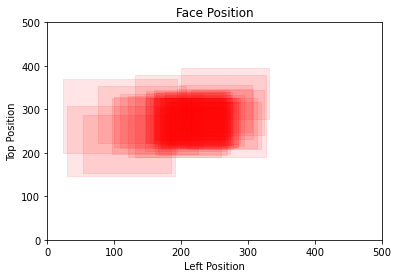

In [154]:
import matplotlib.patches as patches
max_width = max(face, key=lambda f: f['left'] + f['width'] if f else 0)
max_width = max_width['left'] + max_width['width']
max_height = max(face, key=lambda f: f['top'] + f['height'] if f else 0)
max_height = max_height['top'] + max_height['height']

fig = plt.figure()
ax1 = fig.add_subplot(111)
for f in face:
    if f:
        ax1.add_patch(patches.Rectangle((f['top'], f['left']), f['width'], f['height'], color=(1, 0, 0, 0.1)))
plt.title('Face Position')
plt.xlabel('Left Position')
plt.ylabel('Top Position')
plt.ylim((0, 500))
plt.xlim((0, 500));

It may be interesting to look at where certain team members center their face, so let's add a color

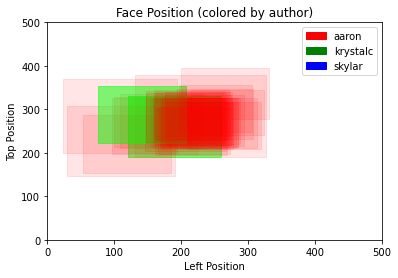

In [155]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
for i in range(len(face)):
    f = face[i + 1]
    author = df['author'][i + 1]
    if not f:
        continue
    if author == 'aaron':
        ax1.add_patch(patches.Rectangle((f['top'], f['left']), f['width'], f['height'], color=(1, 0, 0, 0.1)))
    if author == 'krystalc':
        ax1.add_patch(patches.Rectangle((f['top'], f['left']), f['width'], f['height'], color=(0, 1, 0, 0.5)))
    if author == 'skylar':
        ax1.add_patch(patches.Rectangle((f['top'], f['left']), f['width'], f['height'], color=(0, 0, 1, 1)))
plt.legend(handles=[
    patches.Patch(color='red', label='aaron'),
    patches.Patch(color='green', label='krystalc'), 
    patches.Patch(color='blue', label='skylar')
])
plt.title('Face Position (colored by author)')
plt.xlabel('Left Position')
plt.ylabel('Top Position')
plt.ylim((0, 500))
plt.xlim((0, 500));

As shown above, Skylar's face was undetectable in his photos as his data does not show up on the graph. Aaron's face makes up the majority of the data, and Krystal's face data is similar to Aaron's.

It may also be interesting to plot the movement of faces over time. Do we get closer to the screen as time goes on? Does are face position get lower late into the night?

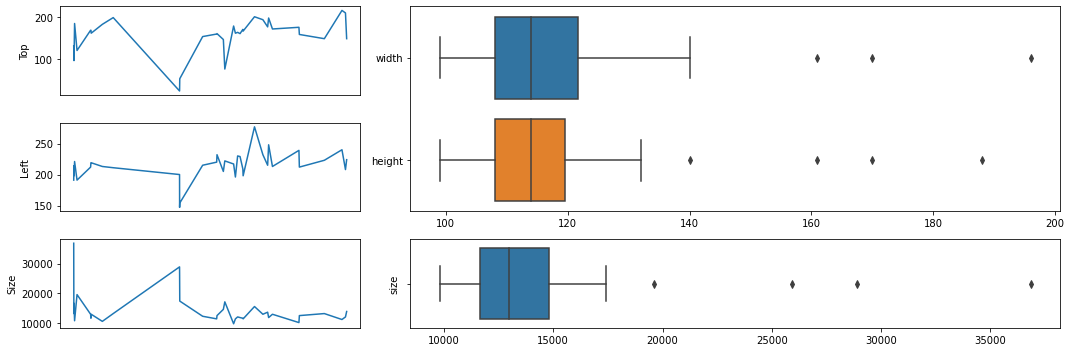

In [257]:
# clean
face_non_null_bool = face.apply(lambda i: bool(i))
face_non_null = df[face_non_null_bool]
face_non_null.loc[:, 'top'] = face_non_null['face'].apply(lambda i: i['top'])
face_non_null.loc[:, 'left'] = face_non_null['face'].apply(lambda i: i['left'])
face_non_null.loc[:, 'width'] = face_non_null['face'].apply(lambda i: i['width'])
face_non_null.loc[:, 'height'] = face_non_null['face'].apply(lambda i: i['height'])

# plot
fig = plt.figure()
grid = plt.GridSpec(3, 3)
# top
plt.subplot(grid[0, 0])
plt.plot(face_non_null['timestamp'], face_non_null['top'])
plt.ylabel('Top')
plt.xticks([], [])
# left
plt.subplot(grid[1, 0])
plt.plot(face_non_null['timestamp'], face_non_null['left'])
plt.ylabel('Left')
plt.xticks([], [])

# face size
plt.subplot(grid[2, 0])
plt.plot(face_non_null['timestamp'], face_non_null['width'] * face_non_null['height'])
plt.ylabel('Size')
plt.xticks([], [])
#distribution for height/width/size
plt.subplot(grid[:2, 1:])
sns.boxplot(y='variable', x='value', data=pd.melt(face_non_null[['width', 'height']]), orient='h')
plt.ylabel('')
plt.xlabel('')

plt.subplot(grid[-1, 1:])
sns.boxplot(face_non_null['width'] * face_non_null['height'])
plt.ylabel('size')

plt.tight_layout()
plt.rcParams["figure.figsize"] = (10,15)
plt.show();

### Conclusions
Looking at our time-series graphs, we can see that there is a downward trend in both top and left face position towards the middle of the hackathon (i.e. towards the middle of the night). However, the boxplots tell us that our face data mainly lies in a range of around 20 pixels (10% of the screen), which is hardly significant enough to draw any major conclusions.     

Unfortunately, Azure's Face API is quite limited. It doesn't tell us different what it thinks the person is feeling, lighting conditions, or really anything besides the size and position of the face. In the future, we might run our photos against a more sophisticated face detection algorithm to determine more interesting data points to plot. 

# NLP Data

Again, we need to first take a look at what our data looks like:

In [285]:
nlp = df.loc[:, ['timestamp', 'message', 'nlp']]
nlp.head()

,timestamp,message,nlp
1,2020-03-07 06:41:53.049,{krystal},"{'positive': 0.02, 'neutral': 0.98, 'negative'..."
2,2020-03-07 06:42:44.060,{krystal},"{'positive': 0.02, 'neutral': 0.98, 'negative'..."
3,2020-03-07 06:43:07.332,{krystal},"{'positive': 0.02, 'neutral': 0.98, 'negative'..."
4,2020-03-07 06:43:43.251,{krystal},"{'positive': 0.02, 'neutral': 0.98, 'negative'..."
5,2020-03-07 06:46:44.700,message,"{'positive': 0.1, 'neutral': 0.73, 'negative':..."


From the Azure NLP data, we can take a look at sentiment over time

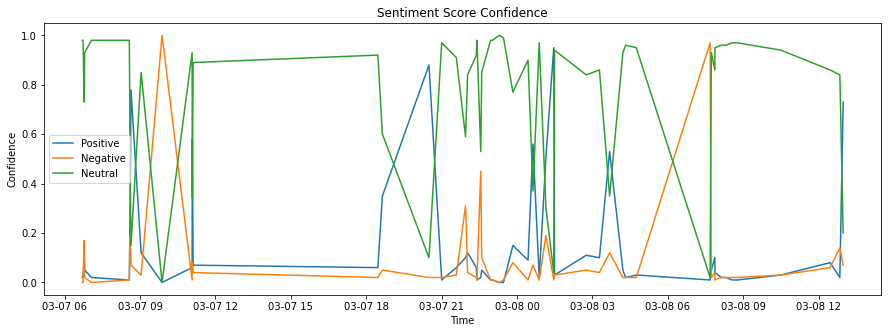

In [286]:
# get useful features 
nlp['positive'] = nlp['nlp'].apply(lambda i: i['positive']) 
nlp['negative'] = nlp['nlp'].apply(lambda i: i['negative'])
nlp['neutral'] = nlp['nlp'].apply(lambda i: i['neutral'])

plt.plot(nlp.timestamp, nlp['positive'], label='Positive')
plt.plot(nlp.timestamp, nlp['negative'], label='Negative')
plt.plot(nlp.timestamp, nlp['neutral'], label='Neutral')

plt.title('Sentiment Score Confidence')
plt.ylabel('Confidence')
plt.xlabel('Time')
plt.legend()
plt.rcParams["figure.figsize"] = (15,5)
plt.show();

This graph is way too messy to say anything useful. Let's clean this up a bit. 

We'll use the confidence returned by the Sentiment API to get a weighted score between 0 and 1. This will return a score for each message between zero and one, with zero being the most negative and one being the most positive. This should give a better idea at the predicted sentiment than the above graph. 
```
        1.0 * positive + 0.5 * neutral + 0.0 * negative
score = -----------------------------------------------
              (positive + neutral + negative)
```

(This is the formula we'll use)

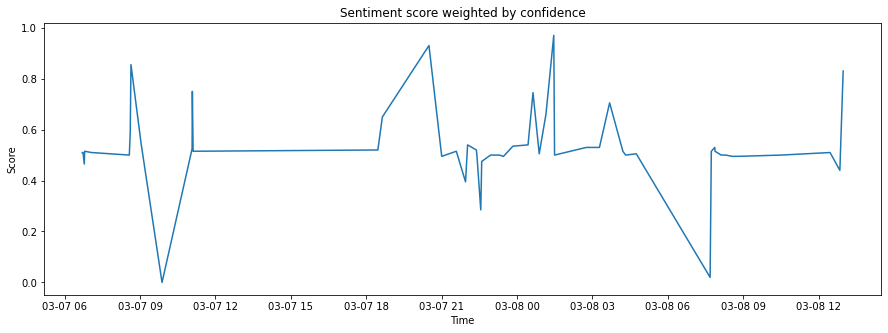

In [305]:
nlp['averaged'] = (nlp['positive'] + 0.5*nlp['neutral'])/(nlp['positive'] + nlp['neutral'] + nlp['negative'])
plt.plot(nlp.timestamp, nlp['averaged'])
plt.title('Sentiment score weighted by confidence')
plt.ylabel('Score')
plt.xlabel('Time')
plt.show();

As we can see from this graph, most of the scores actually fall quite close to the neutral (around 0.5). Taking a look at the what types of messages there are might explain this outcome

In [313]:
nlp[['message', 'averaged']][10:20]

,message,averaged
11,database updated,0.545
12,add add to queue butt,0.000
13,add html stuff,0.525
14,forgot to add files last time,0.750
15,move to sandbox ebay,0.515
16,move to sandbox ebay,0.515
17,files updated,0.520
18,files updated,0.520
19,files updated,0.520
20,added comments,0.650


In [320]:
nlp['message'].value_counts()

{krystal}                                    5
update server order method                   3
files updated                                3
updated landing page with images             2
updated post and get                         2
move to sandbox ebay                         2
added comments                               2
inject js into search page ok                1
fix missing params in login                  1
start queue sometimes                        1
oops forgot to add listener type             1
add local storage                            1
fix git                                      1
updated enqueue                              1
updated landing page with text               1
add gitignore                                1
message                                      1
add dependencies for gcp deploy              1
search logic DONE                            1
fix up background.js/search.js separation    1
add better loading animation                 1
add login log

We can see a few interesting things:     
1. Azure frequently gives neutral scores to messages with technical terms like html, sandbox, and files. Without context, it might be hard to know whether or not these messages are positive or negative. 
2. There are a lot of repeat messages, which could explain the flat lines in the graph.
3. There doesn't really seem to be any noticable trend between time and predicted sentiment.

Of course, sentiment analysis from the Azure API is far from perfect. It may be worthwhile to look at emotions via facial expressions to supplement the data above in the future.

It may also be interesting to look at message length. Maybe we're less tempted to write longer messages later into the night?

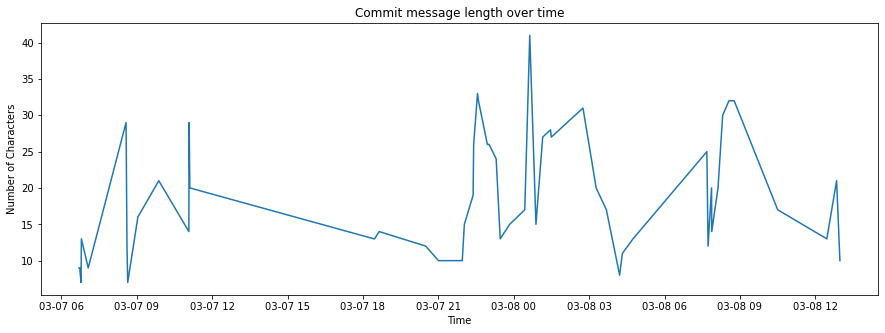

In [288]:
nlp['length'] = nlp['message'].apply(lambda i: len(i))

plt.plot(nlp.timestamp, nlp['length'])
plt.title('Commit message length over time')
plt.ylabel('Number of Characters')
plt.xlabel('Time')
plt.show();

It does seem to be the case that there are shorter messages during the night. Curiously, it also resembles the "Top" graph from the face data above with a downward sloping trend later in the day. Let's see if this is really the case.

For convenience this is what the face table looks like

In [290]:
face_non_null.head()

,timestamp,author,img,message,nlp,face,top,left,width,height
1,2020-03-07 06:41:53.049,aaron,1583563313575-827655847.jpg,{krystal},"{'positive': 0.02, 'neutral': 0.98, 'negative'...","{'top': 131, 'left': 191, 'width': 196, 'heigh...",131,191,196,188
2,2020-03-07 06:42:44.060,aaron,1583563364482-79528200.jpg,{krystal},"{'positive': 0.02, 'neutral': 0.98, 'negative'...","{'top': 108, 'left': 211, 'width': 124, 'heigh...",108,211,124,124
3,2020-03-07 06:43:07.332,aaron,1583563387718-833058606.jpg,{krystal},"{'positive': 0.02, 'neutral': 0.98, 'negative'...","{'top': 99, 'left': 214, 'width': 115, 'height...",99,214,115,115
4,2020-03-07 06:43:43.251,aaron,1583563423677-886855802.jpg,{krystal},"{'positive': 0.02, 'neutral': 0.98, 'negative'...","{'top': 96, 'left': 198, 'width': 129, 'height...",96,198,129,129
6,2020-03-07 06:47:36.324,aaron,1583563656650-442487788.jpg,add gitignore,"{'positive': 0.05, 'neutral': 0.93, 'negative'...","{'top': 184, 'left': 221, 'width': 104, 'heigh...",184,221,104,104


Let's graph length vs vertical face position just to confirm the similarity. 

We'll first convert both datasets to standard units just to scale both to the same axes. Then we'll create the line plot below.

Correlation coefficient: 0.3432488480462997


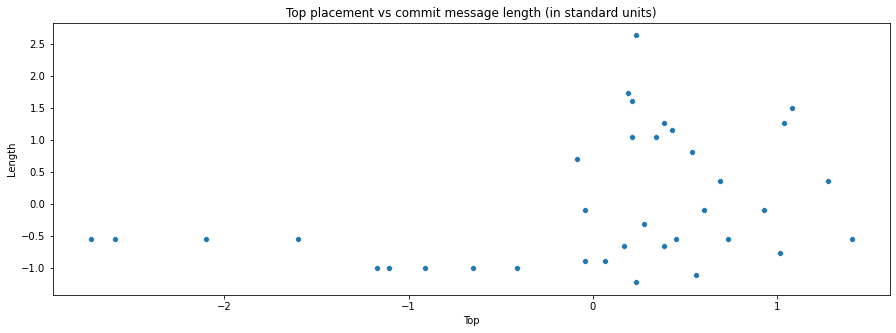

In [316]:
top = face_non_null['top']
length = face_non_null['message'].apply(len)
top_std = (top - np.mean(top))/np.std(top)
length_std = (length - np.mean(length))/np.std(length)
sns.scatterplot(top_std, length_std)
plt.title('Top placement vs commit message length (in standard units)')
plt.ylabel('Length')
plt.xlabel('Top')
print(f'Correlation coefficient: {np.corrcoef(top, length)[0][1]}')

Unfortunately, such a low correlation corefficient suggests that our suspicions were false. There isn't really that much of a correlation between these two datasets.

### Conclusions
Like the Face API, the Azure's language APIs are quite limited. We could not say anything too conclusive from our messages alone. We was interesting, however, was that our most common commit message was Krystal typing her name instead of adding anything useful into the log.


# Next Steps

Even though our "experiment" in using Azure to analyze our data was rather unfruitful today, we do still have our data from this hackathon. Here are some ideas of what we can do with the data in the future: 
* Track developer productivity in relation to the emotions they're feeling
* (UNETHICAL) Find out what a productive developer "looks like" and prune a recruiting pool based on that
* Alert users when they are sitting to close to the computer when commiting
* Reward developers based on how helpful their git commit messages are

If we collect data across multiple projects/hackathons, we might be able to do more with the aggregate data: 
* Automatically write legible commit messages in the style of an author
* Track when a user is most productive/least tired and intelligently schedule work times around that
* Match developers to teams using their Git data (sorting hat style)